<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo55-alex-edgar/blob/main/ActividadSemanal4Equipo55.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad Semanal 4

Alejandro Juarez C A01168444
Edgar López Valdés A01339939

Instrucciones:
Parte 1: Ejercicio guiado 

Revise el ejercicio guiado para el análisis de componentes principales utilizando el conjunto de datos 


Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.


Paso 2: Interprete cada componente principal en términos de las variables originales

Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.


Paso 3: Identifique valores atípicos

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.


Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

¿Cuál es el número de componentes mínimo y por qué?
¿Cuál es la variación de los datos que representan esos componentes?
¿Cuál es la pérdida de información después de realizar PCA?
De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?
 

Extensión: 200 palabras o más entre todas las respuestas. Sigue el formato pregunta-respuesta.


In [1]:
import pandas as pd
import numpy as np

#Obtenemos el conjunto de datos
df = pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv")


In [2]:
#Vemos las primeras 5 líneas
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [3]:
#Forma del set
df.shape

(30000, 25)

In [4]:
#Veamos la correlación de variables
df.corr()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,1.000000,0.026179,0.018543,0.039178,-0.029079,0.018816,-0.030515,-0.011127,-0.018506,-0.002712,...,0.040464,0.016862,0.016836,0.009647,0.008445,0.039130,0.007806,0.000651,0.002997,-0.014049
X1,0.026179,1.000000,0.024744,-0.219115,-0.108193,0.144684,-0.271265,-0.296461,-0.286249,-0.267390,...,0.294063,0.295614,0.290475,0.195307,0.178431,0.210143,0.203256,0.217177,0.219585,-0.153506
X2,0.018543,0.024744,1.000000,0.014353,-0.031479,-0.090860,-0.057720,-0.070862,-0.065949,-0.060055,...,-0.022029,-0.017169,-0.016893,-0.000179,-0.001427,-0.008581,-0.002267,-0.001688,-0.002781,-0.039919
X3,0.039178,-0.219115,0.014353,1.000000,-0.143377,0.175043,0.105386,0.121587,0.114089,0.108867,...,-0.000427,-0.007545,-0.009108,-0.037466,-0.030024,-0.039945,-0.038274,-0.040338,-0.037181,0.028136
X4,-0.029079,-0.108193,-0.031479,-0.143377,1.000000,-0.414227,0.019913,0.024218,0.032543,0.033002,...,-0.023399,-0.025465,-0.021311,-0.005913,-0.008130,-0.003515,-0.012651,-0.001205,-0.006676,-0.024318
X5,0.018816,0.144684,-0.090860,0.175043,-0.414227,1.000000,-0.039442,-0.050166,-0.053055,-0.049730,...,0.051443,0.049401,0.047706,0.025978,0.021794,0.029223,0.021357,0.022790,0.019514,0.013840
X6,-0.030515,-0.271265,-0.057720,0.105386,0.019913,-0.039442,1.000000,0.672145,0.574468,0.538867,...,0.179156,0.180697,0.177062,-0.079246,-0.070112,-0.070467,-0.063968,-0.058145,-0.058668,0.324753
X7,-0.011127,-0.296461,-0.070862,0.121587,0.024218,-0.050166,0.672145,1.000000,0.766770,0.662109,...,0.222257,0.221375,0.219377,-0.080697,-0.059002,-0.055825,-0.046856,-0.037037,-0.036498,0.263570
X8,-0.018506,-0.286249,-0.065949,0.114089,0.032543,-0.053055,0.574468,0.766770,1.000000,0.777115,...,0.227494,0.225465,0.222537,0.001225,-0.066787,-0.053270,-0.046003,-0.035781,-0.035836,0.235573
X9,-0.002712,-0.267390,-0.060055,0.108867,0.033002,-0.049730,0.538867,0.662109,0.777115,1.000000,...,0.246054,0.243007,0.239195,-0.009326,-0.001923,-0.069180,-0.043427,-0.033596,-0.026531,0.216488


In [5]:
#Podemos obtener los valores ordenados de mayor a menor correlación
c = df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

print(type(so))
print(so.size)

<class 'pandas.core.series.Series'>
625


In [81]:
#Aqui podemos ver cuales son las variables con la correlacion mas alta
print(so[1:580])

X2   X18    0.000179
X15  X3     0.000427
X3   X15    0.000427
X22  ID     0.000651
ID   X22    0.000651
              ...   
X17  X13    0.831588
     X14    0.853317
X14  X17    0.853317
X16  X13    0.859776
X13  X16    0.859776
Length: 579, dtype: float64


In [7]:
'''
Los siguiente pares de variables tienen una alta correlacion

X17  X15    0.900940
X15  X17    0.900940
X14  X15    0.923968
X15  X14    0.923968
X14  X13    0.928321
X13  X14    0.928321
X16  X15    0.940141
X15  X16    0.940141
X16  X17    0.946194
X17  X16    0.946194
X13  X12    0.951480
X12  X13    0.951480

Detail on variables
-X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
-X2: Gender (1 = male; 2 = female). 
-X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
-X4: Marital status (1 = married; 2 = single; 3 = others). 
-X5: Age (year). 
-X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. 
The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 
8 = payment delay for eight months; 9 = payment delay for nine months and above. 
-X12-X17: Amount of bill statement (NT dollar). 
X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
-X18-X23: Amount of previous payment (NT dollar). 
X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 
'''

'\nLos siguiente pares de variables tienen una alta correlacion\n\nX17  X15    0.900940\nX15  X17    0.900940\nX14  X15    0.923968\nX15  X14    0.923968\nX14  X13    0.928321\nX13  X14    0.928321\nX16  X15    0.940141\nX15  X16    0.940141\nX16  X17    0.946194\nX17  X16    0.946194\nX13  X12    0.951480\nX12  X13    0.951480\n\nDetail on variables\n-X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. \n-X2: Gender (1 = male; 2 = female). \n-X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). \n-X4: Marital status (1 = married; 2 = single; 3 = others). \n-X5: Age (year). \n-X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: \nX6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. \nThe measurement scale for the repayment

In [8]:
from sklearn.preprocessing import StandardScaler
numCols = ['X1','X5','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']


# Taking a look on correlation between variables
numData = df[numCols].copy()
#We are going to scale this variables
scaler = StandardScaler()

numDataScaled = scaler.fit_transform(numData)
#numData.corr() #Commented for space in executio

var = np.cov(numData)
print(var)

[[2.83233516e+07 1.63841885e+08 1.19757901e+08 ... 2.75898898e+07
  6.84032958e+07 6.05928711e+07]
 [1.63841885e+08 1.00117414e+09 6.95709551e+08 ... 1.93812458e+08
  4.08176342e+08 2.84491979e+08]
 [1.19757901e+08 6.95709551e+08 5.46439866e+08 ... 1.48573260e+08
  3.10069182e+08 3.33471509e+08]
 ...
 [2.75898898e+07 1.93812458e+08 1.48573260e+08 ... 1.10739129e+08
  5.04710958e+07 7.81592820e+07]
 [6.84032958e+07 4.08176342e+08 3.10069182e+08 ... 5.04710958e+07
  1.26723352e+09 3.58025837e+08]
 [6.05928711e+07 2.84491979e+08 3.33471509e+08 ... 7.81592820e+07
  3.58025837e+08 4.86431975e+08]]


In [9]:
ndf = pd.DataFrame(numData, columns=numCols)
ndf.head()
sumVar = ndf.var().sum()
print(sumVar)

45432389004.13748


In [10]:
varPerNumCol = []
for (index, colName) in enumerate(numCols):
  varPerNumCol.append(var[index][index])

print("Total variance:    ",sumVar.round(2))
for (index, varPer) in enumerate(varPerNumCol):
  propVar = ((varPer/sumVar)*100).round(2)
  print("Total variance of",numCols[index],":",propVar,"%")

Total variance:     45432389004.14
Total variance of X1 : 0.06 %
Total variance of X5 : 2.2 %
Total variance of X12 : 1.2 %
Total variance of X13 : 1.01 %
Total variance of X14 : 0.54 %
Total variance of X15 : 1.38 %
Total variance of X16 : 115.83 %
Total variance of X17 : 1.55 %
Total variance of X18 : 2.91 %
Total variance of X19 : 0.11 %
Total variance of X20 : 6.12 %
Total variance of X21 : 9.81 %
Total variance of X22 : 61.45 %
Total variance of X23 : 2.15 %


In [11]:
ndf.corr().round(2)

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
X1,1.00,0.14,0.29,0.28,0.28,0.29,0.30,0.29,0.20,0.18,0.21,0.20,0.22,0.22
X5,0.14,1.00,0.06,0.05,0.05,0.05,0.05,0.05,0.03,0.02,0.03,0.02,0.02,0.02
X12,0.29,0.06,1.00,0.95,0.89,0.86,0.83,0.80,0.14,0.10,0.16,0.16,0.17,0.18
X13,0.28,0.05,0.95,1.00,0.93,0.89,0.86,0.83,0.28,0.10,0.15,0.15,0.16,0.17
X14,0.28,0.05,0.89,0.93,1.00,0.92,0.88,0.85,0.24,0.32,0.13,0.14,0.18,0.18
X15,0.29,0.05,0.86,0.89,0.92,1.00,0.94,0.90,0.23,0.21,0.30,0.13,0.16,0.18
X16,0.30,0.05,0.83,0.86,0.88,0.94,1.00,0.95,0.22,0.18,0.25,0.29,0.14,0.16
X17,0.29,0.05,0.80,0.83,0.85,0.90,0.95,1.00,0.20,0.17,0.23,0.25,0.31,0.12
X18,0.20,0.03,0.14,0.28,0.24,0.23,0.22,0.20,1.00,0.29,0.25,0.20,0.15,0.19
X19,0.18,0.02,0.10,0.10,0.32,0.21,0.18,0.17,0.29,1.00,0.24,0.18,0.18,0.16


In [12]:
import seaborn as sns

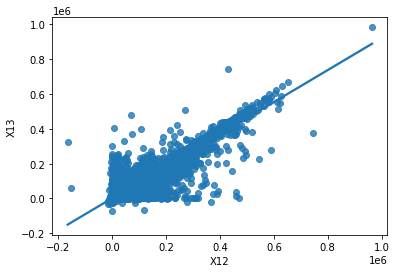

In [15]:
#Graficamos variables con alta correlacion
p = sns.regplot(data = ndf,  
                x = ndf.X12, 
                y = ndf.X13
               ) 
p

In [16]:
#Tienen una correlación positiva

In [17]:
import sklearn
from sklearn.decomposition import PCA

In [24]:
ndf=ndf.dropna()

In [25]:
np.any(np.isnan(ndf))

False

In [26]:
pcs = PCA(n_components=2)
ndf.dropna()
pcs.fit(ndf)

PCA(n_components=2)

In [27]:
pcs.explained_variance_

array([2.77421392e+10, 1.34153892e+10])

In [28]:
np.cumsum(pcs.explained_variance_ratio_)

array([0.61052028, 0.90575227])

In [30]:
pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,166559.716641,0.610520,0.610520
1,115824.821080,0.295232,0.905752


In [45]:
#Definir columnas de PC para componentes principales

newSummary = pcsSummary.transpose()
newSummary.columns = ['PC1', 'PC2']
newSummary = newSummary.round(2)
newSummary

,PC1,PC2
Standard deviation,166559.72,115824.82
Proportion of variance,0.61,0.30
Cumulative proportion,0.61,0.91


In [46]:
#Primer componente 61% de varianza mientras que el segundo alcanzo 30%

#Para visualizar los datos usaremos Scree Plot

In [47]:
import matplotlib as mpl
import matplotlib.pyplot as plt


In [48]:
pc_components = np.arange(pcs.n_components_) + 1
pc_components

array([1, 2])

In [49]:
cusm = np.cumsum(pcs.explained_variance_ratio_)
vartio = pcs.explained_variance_ratio_
cusm

array([0.61052028, 0.90575227])

In [50]:
vartio

array([0.61052028, 0.295232  ])

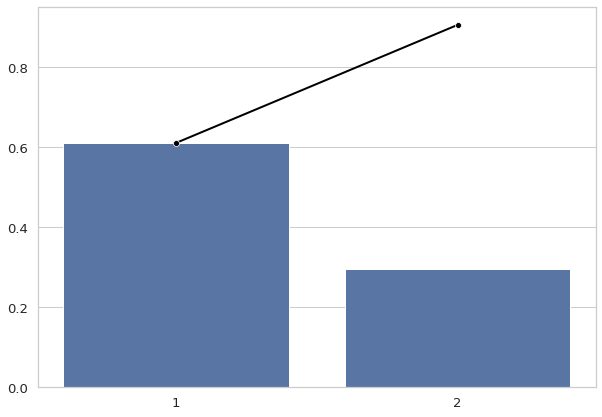

In [54]:
#Visualizamos los valores calculados previamente utilizando las libretias de seaborn y matplotlib
scree = sns.set(style = "whitegrid", font_scale = 1.2)
fig, ax = plt.subplots(figsize = (10,7))
scree = sns.barplot(x = pc_components, y = vartio, color = 'b')
scree = sns.lineplot(x = pc_components - 1, y = cusm, color='black', linestyle = '-', linewidth = 2, marker='o')

#La gráfica nos muestra que el primer componente tiene mas varianza

In [55]:
#PC de todo el dataframe

numCols = ['X1','X5','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']

ndf = df[numCols].copy()
ndf = ndf.dropna()


In [56]:
pcs = PCA()
pcs.fit(ndf)

PCA()

In [66]:
pcsSummary1 = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary1 = pcsSummary1.round(2)
pcsSummary1 = pcsSummary1.transpose()

In [59]:
pc_components = np.arange(pcs.n_components_) + 1
pc_components

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [60]:
cusm = np.cumsum(pcs.explained_variance_ratio_)
vartio = pcs.explained_variance_ratio_
cusm

array([0.61052028, 0.90575227, 0.93628927, 0.95322589, 0.96265096,
       0.97169645, 0.97924207, 0.98562964, 0.99146996, 0.99443792,
       0.9968232 , 0.99852163, 1.        , 1.        ])

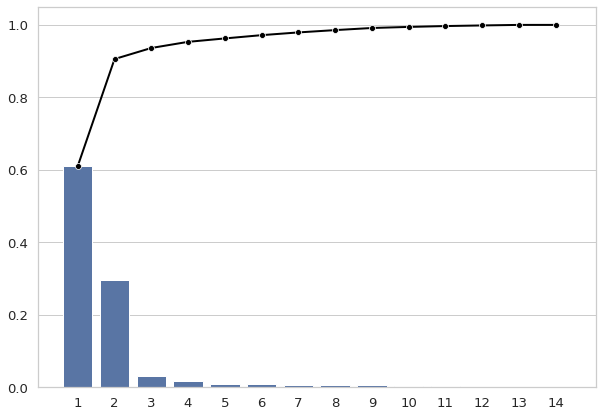

In [61]:
scree = sns.set(style = "whitegrid", font_scale = 1.2)
fig, ax = plt.subplots(figsize = (10,7))
scree = sns.barplot(x = pc_components, y = vartio, color = 'b')
scree = sns.lineplot(x = pc_components - 1, y = cusm, color='black', linestyle = '-', linewidth = 2, marker='o')

In [62]:
#La mayor varianza son los primeros componentes, es momento de verificar los elementos que aportan mayormente a los componentes



In [67]:
pcsSummary1.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary1.columns)+1)]
pcsSummary1.columns 

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14'],
      dtype='object')

In [68]:
pcsSummary1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,166559.72,115824.82,37250.58,27741.72,20694.84,20273.83,18516.87,17036.78,16290.65,11613.11,10410.94,8785.04,8196.18,9.11
Proportion of variance,0.61,0.30,0.03,0.02,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00
Cumulative proportion,0.61,0.91,0.94,0.95,0.96,0.97,0.98,0.99,0.99,0.99,1.00,1.00,1.00,1.00


In [70]:
pcsCompsDf = pd.DataFrame(pcs.components_.transpose(), columns = pcsSummary1.columns, index = ndf.columns)
pcsCompsDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
X1,0.491112,0.869293,-0.020547,-1.841244e-02,-0.044134,0.016887,-0.001108,0.001024,0.009466,3.745915e-03,0.005830,0.000013,0.001874,-1.036598e-05
X5,0.000006,0.000008,-0.000004,-2.464416e-07,-0.000005,0.000002,-0.000001,-0.000002,0.000007,-1.745195e-07,0.000005,-0.000009,-0.000002,1.000000e+00
X12,0.388596,-0.221110,-0.548874,-2.049161e-01,0.316851,0.002729,-0.456350,0.007256,0.070330,1.726518e-01,-0.267348,-0.204634,-0.005864,-2.640152e-06
X13,0.381480,-0.226174,-0.390970,-3.780502e-02,0.011512,-0.080552,0.526899,-0.066022,0.099284,7.951468e-03,0.351031,0.476478,0.015966,7.034803e-07
X14,0.372296,-0.216331,-0.048179,5.534518e-01,-0.247660,0.295781,0.028737,0.081246,-0.108058,-3.365314e-01,0.151500,-0.441629,-0.082463,-5.985742e-06
X15,0.346497,-0.193871,0.260995,7.913774e-02,-0.367769,-0.473349,-0.178223,-0.227752,-0.097382,-1.369318e-01,-0.374933,0.233494,0.318900,4.240909e-06
X16,0.323006,-0.176620,0.428100,-2.000533e-01,-0.015767,-0.078352,-0.013439,0.480124,0.126439,1.009990e-01,-0.052458,0.092384,-0.605491,1.565428e-06
X17,0.308671,-0.167194,0.483748,-3.083410e-01,0.226787,0.391837,0.076834,-0.262913,-0.105433,2.367719e-01,0.203098,-0.158534,0.366235,5.918095e-07
X18,0.026548,0.005712,0.037461,1.934820e-01,0.202555,-0.228011,0.611709,-0.082568,0.170894,2.791275e-01,-0.470884,-0.396555,-0.017226,-1.681789e-07
X19,0.031276,0.010813,0.159998,6.733109e-01,0.337270,0.107705,-0.254770,-0.004653,0.226390,3.581116e-01,0.023435,0.383956,0.047000,3.534330e-06


In [71]:
#Los mas importantes son X12 A X17 en la mayoria recordemos que
''' 
-X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
-X12-X17: Amount of bill statement (NT dollar). 
X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. '''


' \n-X12-X17: Amount of bill statement (NT dollar). \nX12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. '

In [72]:
pcsCompsDf.PC1.abs().nlargest(3)

X1     0.491112
X12    0.388596
X13    0.381480
Name: PC1, dtype: float64

In [73]:
pcsCompsDf.PC2.abs().nlargest(3)

X1     0.869293
X13    0.226174
X12    0.221110
Name: PC2, dtype: float64

In [74]:
#Asi que podemos concluir que los mas importantes son la cantidad de crédito otorgada y la cantidad de los recibos mensuales

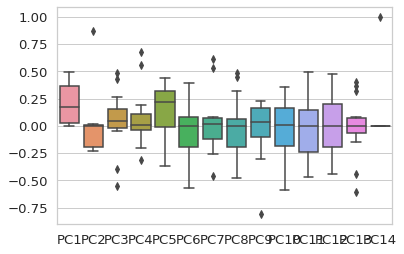

In [79]:
#Hagamos ahora un boxplot para determinar si existen valores atipicos

sns.boxplot(data=pcsCompsDf)


'\nEs posible observar que existen algunos valores atipicos en el dataframe de componentes principales, en realidad no son muchos para el tamaño del conjunto, sin embargo\n, vale la pena analizar si se pueden dar de pronto debido a pagos adelantados, o retrasados en las facturas, o si se relacionan tal vez a alguna época en particular en la que se otorgaron créditos\n'

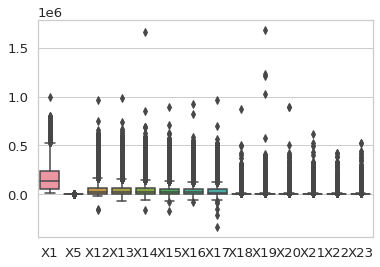

In [80]:
sns.boxplot(data=ndf)
'''
Es posible observar que existen algunos valores atipicos en el dataframe de componentes principales, en realidad no son muchos para el tamaño del conjunto, sin embargo
, vale la pena analizar si se pueden dar de pronto debido a pagos adelantados, o retrasados en las facturas, o si se relacionan tal vez a alguna época en particular en la que se otorgaron créditos
'''

#Parte 2

¿Cuál es el número de componentes mínimo y por qué? 

El número de componentes mínimo es 17, aunque si se realiza un análisis más profundo a las variables que también tienen un alto nivel de correlación como serían tal vez el historial de pagos, podríamos llegar a pensar que el mínimo es 8. Por las observaciones realizadas hasta ahora encontramos que la correlación entre X12-X13 es la mayor por la que podríamos unificarlos, sin embargo, encontramos también que la relación que mantienen estas últimas con X14,X15,X16 y X17 también es muy grande por lo que valdría la pena resumirlas también.



¿Cuál es la variación de los datos que representan esos componentes? 
Alrededor del 65% de varianza por lo que si se reduce podría ser que si se pierdan bastantes valores atipicos, de hecho si lo visualizamos en el box plot contra el set original vemos la diferencia enorme que existe entre ambos.


¿Cuál es la pérdida de información después de realizar PCA? 
Se pueden perder algunos valores durante la normalización, pero en general la pérdida ocurre durante la selección de componentes principales, ya que si no somos cuidadosos podríamos estar siendo negligentes al eliminar alguna columna o resumirla de manera que se pierda información valiosa para la toma de decisiones. En este caso en particular al reducir dimensiones podríamos estar perdiendo más del 20% por lo que si seguimos reduciendo el número sería bastante grande.

De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales? 

La de mayor importancia es la cantidad de crédito otorgado, lo que hace completo sentido ya que muchas de las variables tienen que ver con historial de pago o cantidad en los recibos mensuales. La que tiene menos importancia es el genero ya que los demás valores no se ven tan afectados por este parámetro.

¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

PCA se recomienda cuando el número de variables es muy grande y el análisis puede volverse costoso y repetitivo si la correlación entre las mismas es elevada.